#### About

> Overfitting and regularization.

Overfitting: Overfitting occurs when a machine learning model learns to perform well on the training data but does not generalize well to unseen data. In other words, the model becomes too complex and captures noise or random fluctuations in the training data, rather than the underlying patterns or relationships. This can result in poor performance on new, unseen data.

Regularization: Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the model's objective function, which discourages the model from assigning too much importance to any single feature. Regularization helps to constrain the model's parameters and limit its complexity, thereby improving its ability to generalize well to unseen data.


> Example of Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
degrees = [1, 4, 15]


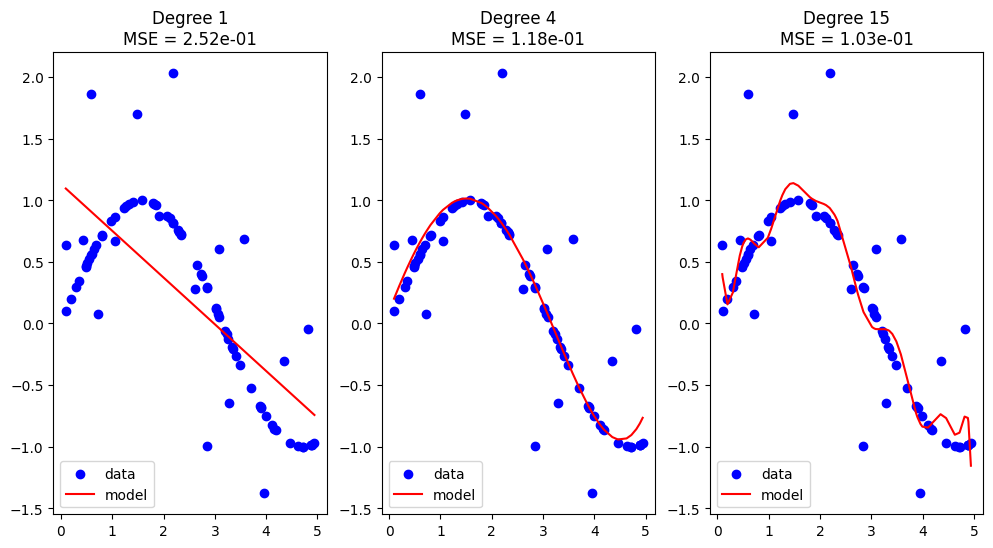

In [5]:
plt.figure(figsize=(12, 6))
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X, y, color='blue', label='data')
    model = make_pipeline(PolynomialFeatures(degrees[i]), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, color='red', label='model')
    plt.title("Degree {}\nMSE = {:.2e}".format(degrees[i], mean_squared_error(y, y_pred)))
    plt.legend(loc='lower left')

plt.show()

As we increase the degree of the polynomial, the model becomes more complex and starts to overfit the noisy data, resulting in poor generalization performance as seen from the increasing mean squared error (MSE) values

> Example of Regularization

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [9]:
# Load and split the diabetes dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:

# Fit Ridge regression models with varying alpha values
alphas = [0, 0.1, 1, 10]
mse_train = []
mse_test = []

In [11]:
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))


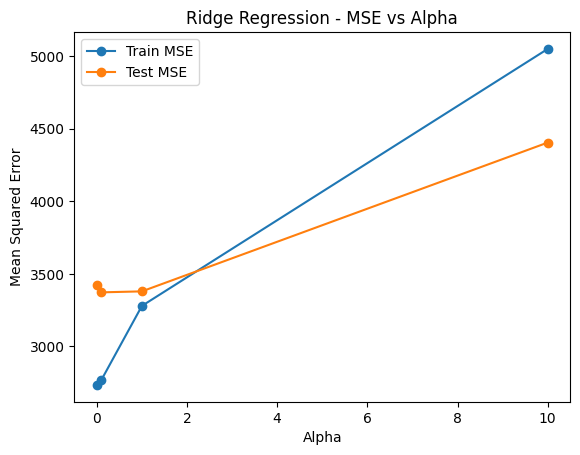

In [12]:
# Plot MSE vs alpha values
plt.plot(alphas, mse_train, 'o-', label='Train MSE')
plt.plot(alphas, mse_test, 'o-', label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression - MSE vs Alpha')
plt.legend()
plt.show()

We fit Ridge regression models with varying alpha values (0, 0.1, 1, and 10) to the diabetes dataset and plot the mean squared error (MSE) for both the training and test datasets against the alpha values. As we increase the value of alpha, the model's complexity is reduced, resulting in lower MSE for the training data but potentially higher MSE for the test data, thus demonstrating the regularization effect. The optimal value of alpha can be chosen based on the trade-off between overfitting and underfitting, typically determined through cross-validation or other model evaluation techniques.